## Aplicación de análisis de datos (práctica)

### Anexar notebook o pdf de la misma al Google Classroom para que valga por 2 prácticas si está completa, o lo proporcional correspondiente.

- Elegir un conjunto de datos.
- Puede ser de:
    - https://archive.ics.uci.edu/ml/index.php
    - https://www.kaggle.com/datasets 
    - o datos abiertos:    
        - https://datos.gob.mx
        - https://datos.cdmx.gob.mx/
    - u otras fuentes.
    
- Hacer análisis exploratorio, reducir variables y plantear pregunta a investigar.
- Elegir si conviene un análisis de clasificación o clustering.
- Elegir algoritmo o algoritmos.
- Implementar algoritmos.
- Evaluar algoritmos implementados.
- Predecir o sacar conclusiones del análisis, graficar algún resultado.

**Usaremos el siguiente conjuntode datos:** https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/Dataset_CGO_2018_2022.csv

**1. Describir variables (ejercicio):**

- Date: Fecha y hora específica de consumo. Entre los años 2018-2022.

- Demand: Demanda de energía eléctrica de la zona de Camargo, Chihuahua. Mega-Watts.

- Temperature: Grados Centígrados.

- PrecipIntensity: mm^3, lluvia. 

- Humidity: Humedad (%).

- WindSpeed: Velocidad del viento m/s.


**2. Analisis exploratorio y primer preprocesamiento de datos**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')

In [2]:
data_url = 'https://raw.githubusercontent.com/igomezv/DataScienceIntermedio/main/datasets/Dataset_CGO_2018_2022.csv'
df = pd.read_csv(data_url)

In [3]:
df.head(5)

,Date,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
0,01/01/2018 00:00,234.6425,13.9,0.0,49.2,3.3
1,01/01/2018 01:00,229.0717,12.4,0.0,52.1,3.4
2,01/01/2018 02:00,223.3983,10.8,0.0,55.2,3.6
3,01/01/2018 03:00,215.7792,9.3,0.0,58.6,3.7
4,01/01/2018 04:00,211.4717,8.2,0.0,59.4,3.3


In [4]:
df_filtered = df[['Demand', 'Temperature', 'PrecipIntensity', 'Humidity', 'WindSpeed']]

In [5]:
df_filtered.corr()

,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
Demand,1.000000,0.729337,0.019431,-0.207505,0.113248
Temperature,0.729337,1.000000,0.009773,-0.141563,0.176253
PrecipIntensity,0.019431,0.009773,1.000000,0.013182,0.068202
Humidity,-0.207505,-0.141563,0.013182,1.000000,-0.495910
WindSpeed,0.113248,0.176253,0.068202,-0.495910,1.000000


In [6]:
np.abs(df_filtered.corr()) > 0.5

,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed
Demand,True,True,False,False,False
Temperature,True,True,False,False,False
PrecipIntensity,False,False,True,False,False
Humidity,False,False,False,True,False
WindSpeed,False,False,False,False,True


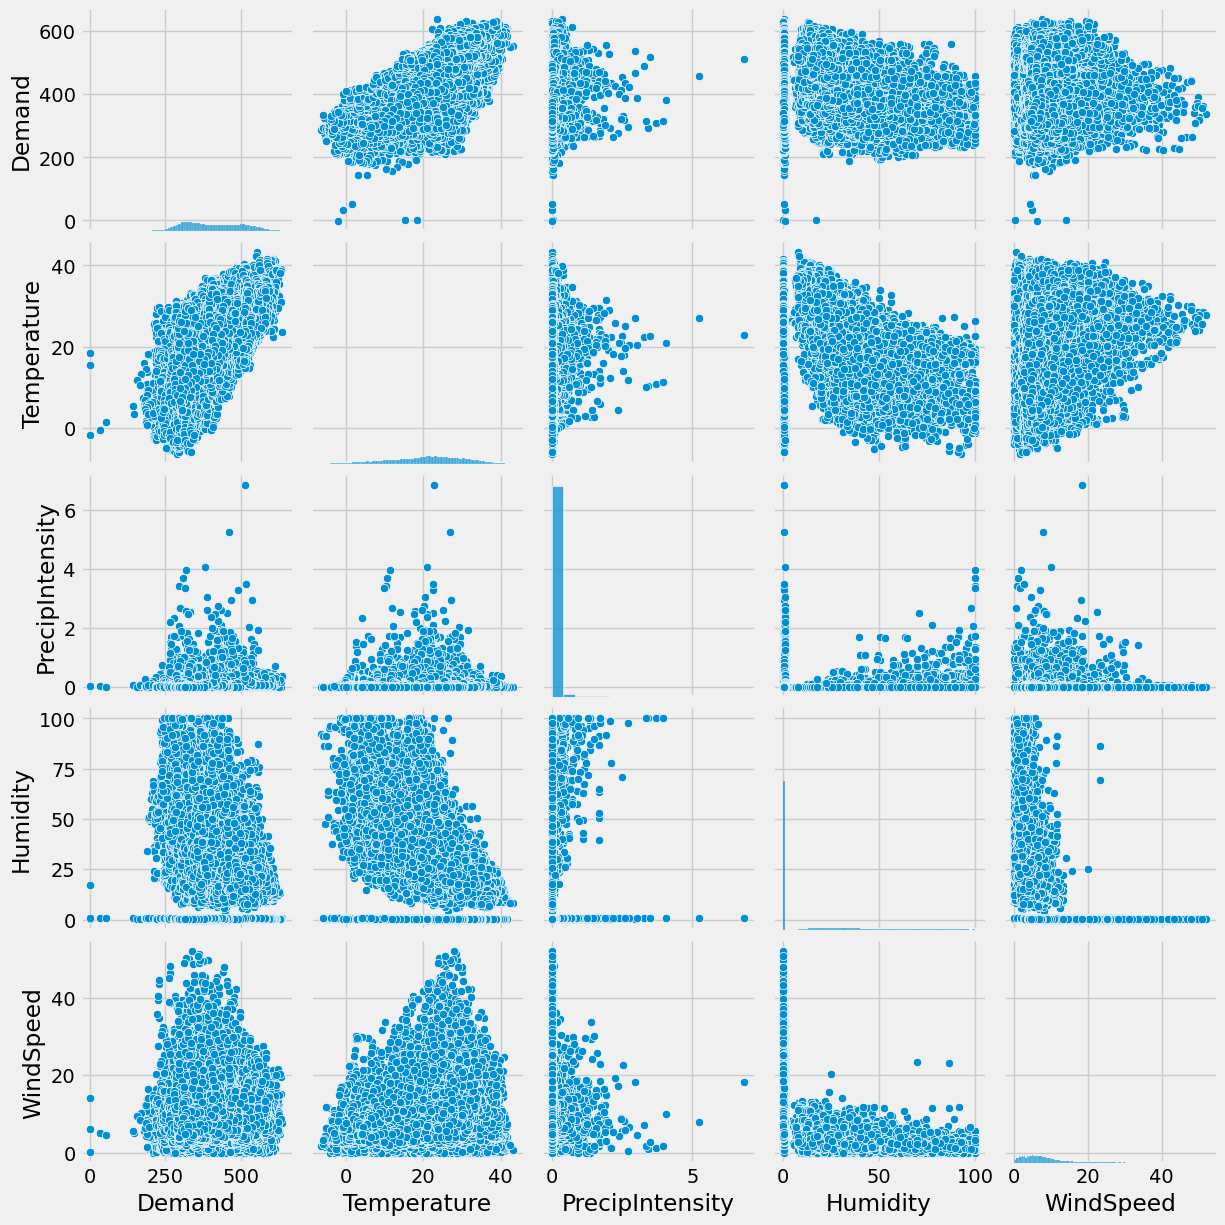

In [7]:
sns.pairplot(df_filtered)

In [8]:
df["Date"].head()

0    01/01/2018 00:00
1    01/01/2018 01:00
2    01/01/2018 02:00
3    01/01/2018 03:00
4    01/01/2018 04:00
Name: Date, dtype: object

In [9]:
type(df['Date'][0])

str

In [10]:
# Para indicar que una columna es tipo fecha en un pd.DataFrame, usar pd.to_datatime
df["Date_time"] = pd.to_datetime(df["Date"], format='%d/%m/%Y %H:%M')

In [11]:
df.head(100)

,Date,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed,Date_time
0,01/01/2018 00:00,234.6425,13.9,0.0,49.2,3.3,2018-01-01 00:00:00
1,01/01/2018 01:00,229.0717,12.4,0.0,52.1,3.4,2018-01-01 01:00:00
2,01/01/2018 02:00,223.3983,10.8,0.0,55.2,3.6,2018-01-01 02:00:00
3,01/01/2018 03:00,215.7792,9.3,0.0,58.6,3.7,2018-01-01 03:00:00
4,01/01/2018 04:00,211.4717,8.2,0.0,59.4,3.3,2018-01-01 04:00:00
...,...,...,...,...,...,...,...
95,04/01/2018 23:00,295.3383,11.9,0.0,37.7,2.7,2018-01-04 23:00:00
96,05/01/2018 00:00,281.3200,11.7,0.0,37.4,2.4,2018-01-05 00:00:00
97,05/01/2018 01:00,274.2917,11.1,0.0,35.1,2.3,2018-01-05 01:00:00
98,05/01/2018 02:00,272.0150,10.5,0.0,32.8,2.2,2018-01-05 02:00:00


In [12]:
type(df['Date_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df["Date"] = df["Date_time"].dt.date
df["Time"] = df["Date_time"].dt.time
df.head(5)

,Date,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed,Date_time,Time
0,2018-01-01,234.6425,13.9,0.0,49.2,3.3,2018-01-01 00:00:00,00:00:00
1,2018-01-01,229.0717,12.4,0.0,52.1,3.4,2018-01-01 01:00:00,01:00:00
2,2018-01-01,223.3983,10.8,0.0,55.2,3.6,2018-01-01 02:00:00,02:00:00
3,2018-01-01,215.7792,9.3,0.0,58.6,3.7,2018-01-01 03:00:00,03:00:00
4,2018-01-01,211.4717,8.2,0.0,59.4,3.3,2018-01-01 04:00:00,04:00:00


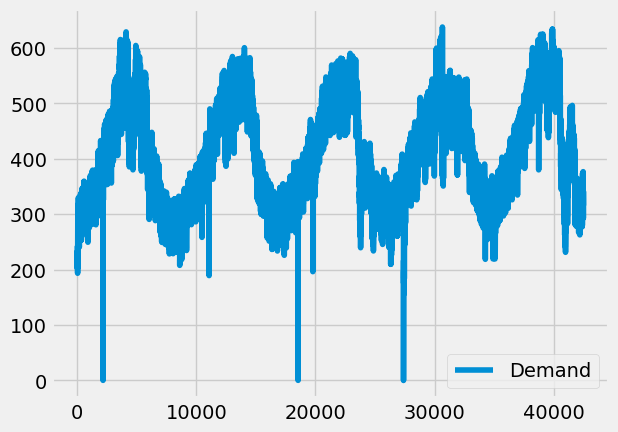

In [14]:
df[['Demand']].plot()
plt.show()

In [15]:
df.index.values

array([    0,     1,     2, ..., 42501, 42502, 42503], dtype=int64)

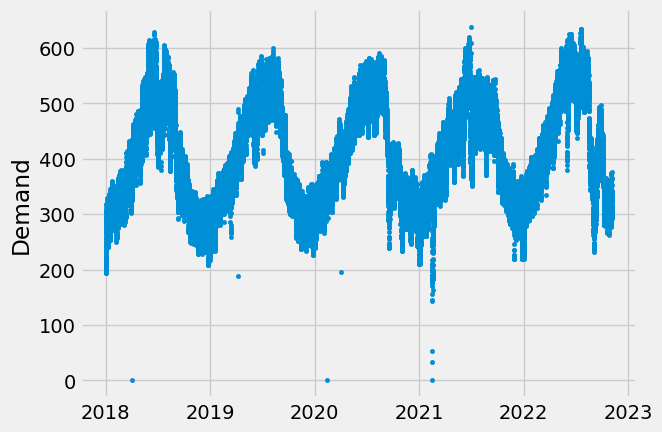

In [16]:
#OR 
plt.scatter(df.Date, df.Demand, marker='.')
plt.ylabel("Demand")
plt.show()

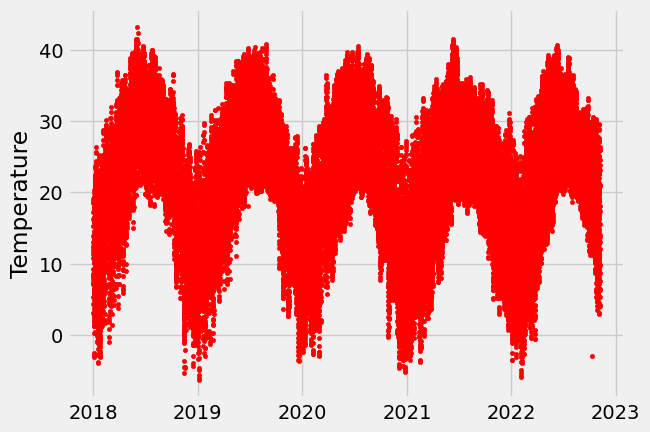

In [17]:
plt.scatter(df.Date, df.Temperature, marker='.', color='red')
plt.ylabel("Temperature")
plt.show()

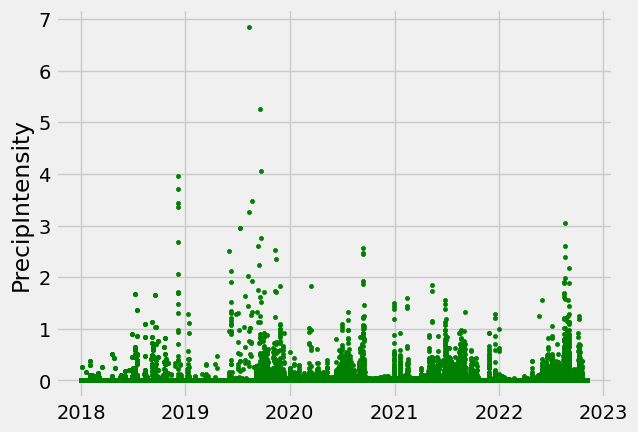

In [18]:
plt.scatter(df.Date, df.PrecipIntensity, marker='.', color='green')
plt.ylabel("PrecipIntensity")
plt.show()

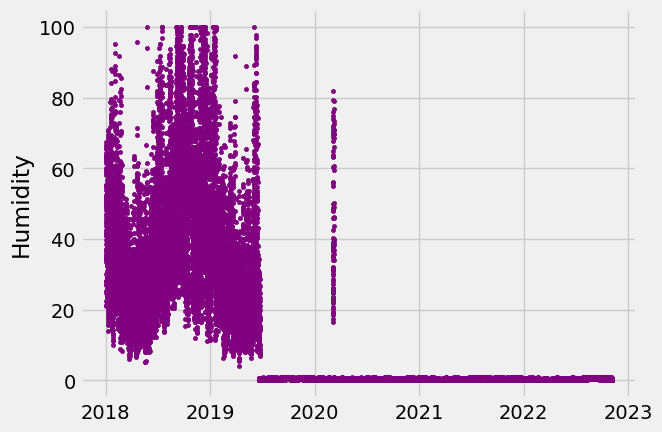

In [19]:
plt.scatter(df.Date, df.Humidity, marker='.', color='purple')
plt.ylabel("Humidity")
plt.show()

In [20]:
df.loc[df['Humidity'] < 1,"Humidity"] = df["Humidity"]*100 

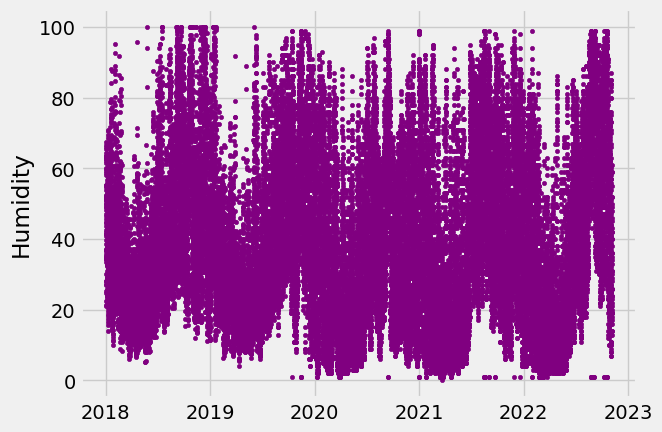

In [21]:
plt.scatter(df.Date, df.Humidity, marker='.', color='purple')
plt.ylabel("Humidity")
plt.show()

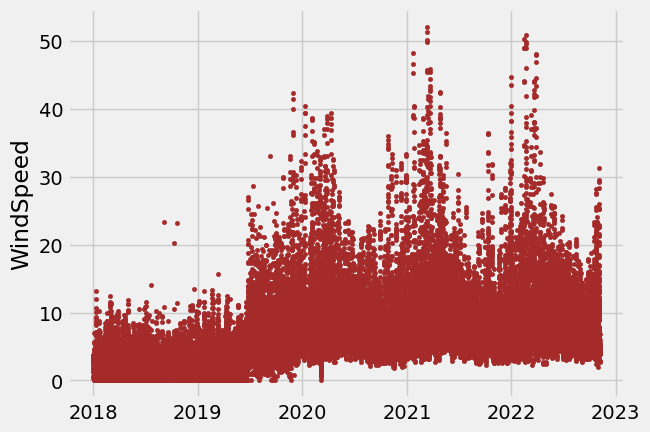

In [22]:
plt.scatter(df.Date, df.WindSpeed, marker='.', color='brown')
plt.ylabel("WindSpeed")
plt.show()

**3. Formular preguntas**. Responderlas vale como ejercicio en Classroom.

- **3.1. Para clasificación, ¿qué variable podría ser nuestra etiqueta?, ¿qué algoritmo usaríamos?**

Everardo: No, quizá la fecha.
Matilde: No.

- **3.2. Para regresión, ¿qué variables podría ser nuestra variable dependiente?, ¿qué variables podríamos considerar y cuáles no?, ¿qué algoritmo usaríamos?**

Everardo: sí
Matilde: sí. 

Nos interesa caracterizar la demanda en función de humedad, precipitación, temperatura y velocidad del tiempo.

¿La fecha influye? Parece que sí. Quizá el año no afecte mucho. 

Algoritmos: Red neuronal multicapa.


- **3.3. ¿Qué variables podríamos considerar para hacer clustering?, ¿valdría la pena?, ¿qué algoritmo usaríamos?**

Parece que no es muy útil hacer un clustering. Nos permitiría ver otro tipo de patrones entre las variables.


- **3.4. ¿Nuestro problema interactúa con variables del entorno?, ¿tendría sentido utilizar Aprendizaje por refuerzo?**

Parece que no mucho, ya está bien consolidada la base de datos.


- **3.5. ¿Podríamos considerar la base de datos como una imágen o una serie de tiempo?**

Como una imagen no.

Como una serie de tiempo sí. Podríamos usar una Red Neuronal Recurrente, como la que usamos para las acciones de IBM.

In [23]:
df["Year"] = df.Date_time.dt.year

df["Month"] = df.Date_time.dt.month

df["Day"] = df.Date_time.dt.day

df["Hour"] = df.Date_time.dt.hour

df["Day_of_week"] = df.Date_time.dt.day_of_week #0: Lunes....6:Domingo

df.head()

,Date,Demand,Temperature,PrecipIntensity,Humidity,WindSpeed,Date_time,Time,Year,Month,Day,Hour,Day_of_week
0,2018-01-01,234.6425,13.9,0.0,49.2,3.3,2018-01-01 00:00:00,00:00:00,2018,1,1,0,0
1,2018-01-01,229.0717,12.4,0.0,52.1,3.4,2018-01-01 01:00:00,01:00:00,2018,1,1,1,0
2,2018-01-01,223.3983,10.8,0.0,55.2,3.6,2018-01-01 02:00:00,02:00:00,2018,1,1,2,0
3,2018-01-01,215.7792,9.3,0.0,58.6,3.7,2018-01-01 03:00:00,03:00:00,2018,1,1,3,0
4,2018-01-01,211.4717,8.2,0.0,59.4,3.3,2018-01-01 04:00:00,04:00:00,2018,1,1,4,0


In [24]:
df2 = df[['Temperature', 'PrecipIntensity', 'Humidity', 'WindSpeed', 'Month', 'Day', 'Hour', 'Day_of_week']]
df2.head(5)

,Temperature,PrecipIntensity,Humidity,WindSpeed,Month,Day,Hour,Day_of_week
0,13.9,0.0,49.2,3.3,1,1,0,0
1,12.4,0.0,52.1,3.4,1,1,1,0
2,10.8,0.0,55.2,3.6,1,1,2,0
3,9.3,0.0,58.6,3.7,1,1,3,0
4,8.2,0.0,59.4,3.3,1,1,4,0


In [25]:
X = df2.values
np.shape(X), type(X)

((42504, 8), numpy.ndarray)

In [26]:
dfy = df[['Demand']]
dfy.head(5)

,Demand
0,234.6425
1,229.0717
2,223.3983
3,215.7792
4,211.4717


In [27]:
Y = dfy.values
np.shape(Y), type(Y)

((42504, 1), numpy.ndarray)

Estandarizar datos:

In [43]:
xscaler =  StandardScaler()
xscaler.fit(X)
X_sc = xscaler.transform(X)

In [44]:
yscaler = StandardScaler()
yscaler.fit(Y)
Y_sc = yscaler.transform(Y)

In [61]:
np.shape(Y)

(42504, 1)

In [ ]:
# yscaler.inverse_transform(vector_trans)

### Haremos una regresión, donde la entrada sea:
Temperature 	PrecipIntensity 	Humidity 	WindSpeed 	Month 	Day 	Hour 	Day_of_week 
#### y la salida:
la Demanda. 

Corresponde separar conjunto de validación y entrenamiento.

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(X_sc, train_size=0.8, shuffle=True, random_state=1)
Y_train, Y_val = train_test_split(Y_sc, train_size=0.8, shuffle=True, random_state=1)

In [46]:
np.shape(X_train), np.shape(X_val), np.shape(Y_train), np.shape(Y_val)

((34003, 8), (8501, 8), (34003, 1), (8501, 1))

#### Diseñar nuestra red neuronal para regresión.

In [47]:
# Importamos las librerias de tensorflow.keras y algunos metodos
import tensorflow.keras as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [48]:
# Red neuronal
model = Sequential()

# n_input debe coincidir con el número de variables independientes, 
# atributos o columnas.
# n_input = 1
###### En nuestro caso, tenemos 8 variables (Temperature, PrecipIntensity,Humidity, WindSpeed, Month, Day, Hour, Day_of_week) 
# por lo tanto, n_input = 8
n_input = 8
hidden_1 = 100
hidden_2 = 100
hidden_3 = 100
# n_output debe coincidir con el número de variables 
# dependientes o etiquetas o clases. En nuestro caso, solo es la Demanda, por tanto n_output=1.
n_output = 1

# Input layer and first hidden layer.
# La primer linea es la única que requiere el input_dim y nos incluye
# la capa de entrada y la primera capa oculta.
model.add(K.layers.Dense(hidden_1, input_dim=n_input, activation='relu'))
# Hidden layers
model.add(K.layers.Dense(hidden_2, activation='relu'))
model.add(K.layers.Dense(hidden_3, activation='relu'))
# Output layer
model.add(K.layers.Dense(n_output, activation='linear'))

optimizer = K.optimizers.Adam(learning_rate=0.0001)

# Se compila el modelo, eligiendo Optimizador y Función de pérdida.
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()

# callbacks = [K.callbacks.EarlyStopping(monitor='val_loss', mode='min',
#                                        min_delta=0.0,
#                                        patience=2,
#                                        restore_best_weights=True)]   

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               900       
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,201
Trainable params: 21,201
Non-trainable params: 0
_________________________________________________________________


#### Entrenar la red neuronal diseñada con nuestros conjuntos de entrenamiento y validación.

In [49]:
epochs = 100
bs = 512

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
                    epochs=epochs, batch_size=bs)

Epoch 1/100
67/67 [==============================] - 1s 10ms/step - loss: 0.8402 - val_loss: 0.6268
Epoch 2/100
67/67 [==============================] - 0s 5ms/step - loss: 0.5071 - val_loss: 0.4212
Epoch 3/100
67/67 [==============================] - 0s 5ms/step - loss: 0.3662 - val_loss: 0.3308
Epoch 4/100
67/67 [==============================] - 0s 6ms/step - loss: 0.3008 - val_loss: 0.2811
Epoch 5/100
67/67 [==============================] - 0s 5ms/step - loss: 0.2593 - val_loss: 0.2444
Epoch 6/100
67/67 [==============================] - 0s 5ms/step - loss: 0.2265 - val_loss: 0.2145
Epoch 7/100
67/67 [==============================] - 0s 6ms/step - loss: 0.2003 - val_loss: 0.1910
Epoch 8/100
67/67 [==============================] - 0s 5ms/step - loss: 0.1803 - val_loss: 0.1734
Epoch 9/100
67/67 [==============================] - 0s 5ms/step - loss: 0.1662 - val_loss: 0.1611
Epoch 10/100
67/67 [==============================] - 0s 6ms/step - loss: 0.1558 - val_loss: 0.1524
Epoch 11

67/67 [==============================] - 0s 5ms/step - loss: 0.0885 - val_loss: 0.0926
Epoch 84/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0880 - val_loss: 0.0925
Epoch 85/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0879 - val_loss: 0.0922
Epoch 86/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0876 - val_loss: 0.0917
Epoch 87/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0874 - val_loss: 0.0923
Epoch 88/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0873 - val_loss: 0.0922
Epoch 89/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0871 - val_loss: 0.0922
Epoch 90/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0869 - val_loss: 0.0914
Epoch 91/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0867 - val_loss: 0.0912
Epoch 92/100
67/67 [==============================] - 0s 5ms/step - loss: 0.0864 - val_loss: 0.0914
Epoch 93/100


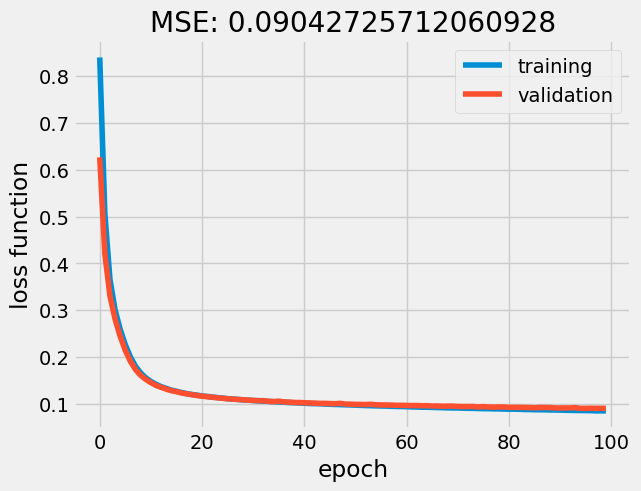

In [50]:
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='validation set')
mse = np.min(history.history['val_loss'])
plt.title('MSE: {}'.format(mse))
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right') 
plt.show()

Para predecir hay que escalar/estandarizar los vectores a predecir, debido a que usamos valores escalados para X y Y en el entrenamiento.

Y para leer la predicción, hay que usar inverse_transform.

In [65]:
vector_test = np.array([13.9, 0.0, 49.2, 3.3,1,1,0,4]).reshape(1,-1)
vector_test_sc = xscaler.transform(vector_test)
ypred_sc = model.predict(vector_test_sc)
np.shape(ypred_sc)

1/1 [==============================] - 0s 34ms/step


(1, 1)

In [66]:
ypred = yscaler.inverse_transform(ypred_sc)
ypred

array([[238.4601]], dtype=float32)

#### Usar métricas de regresión para evaluar el modelo, por ejemplo:

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
y_pred = model.predict(X_val)
mean_squared_error(Y_val, y_pred)

266/266 [==============================] - 1s 2ms/step


0.09052457109481257

In [69]:
mean_absolute_error(Y_val, y_pred)

0.22594509698477716

### Guardar el modelo en formato binario .h5

In [70]:
model.save("modelo_demanda.h5")

## Analizar serie de tiempo

In [103]:
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD

Tenemos del 2018 al 2022, tomaremos los registros del 2022 como conjunto de test.

In [100]:
training_set = df[df["Year"]<2022]

training_set = training_set["Demand"]

test_set = df[df["Year"]>=2022]

test_set = test_set["Demand"]

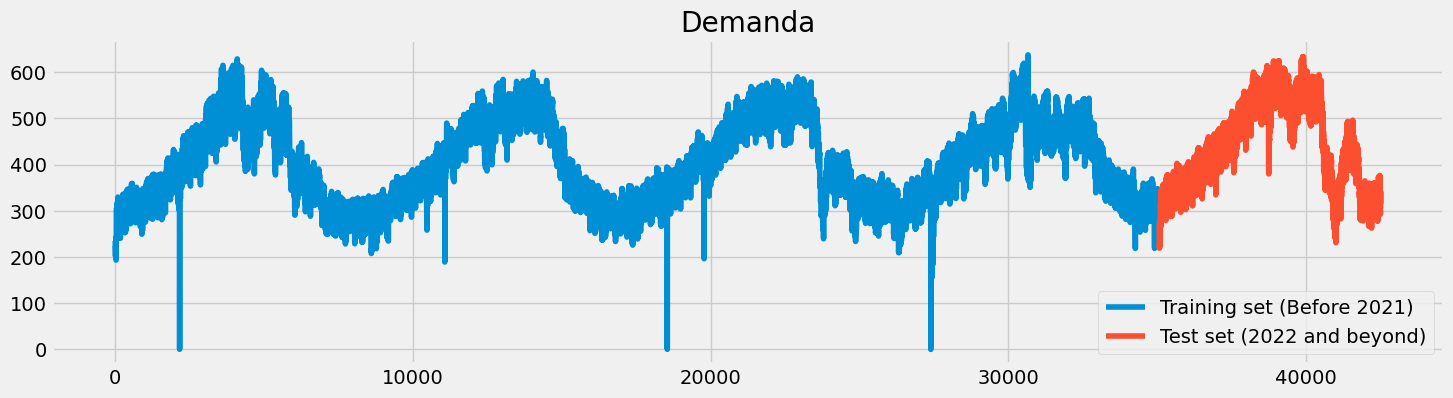

In [101]:
#OR 
training_set.plot(figsize=(16,4),legend=True)
test_set.plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2021)','Test set (2022 and beyond)'])
plt.title('Demanda')
plt.show()

In [108]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set.values.reshape(-1,1))

In [119]:
nlen = len(training_set)
time_step = 60
nlen

35064

In [127]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []

for i in range(time_step, nlen):
    X_train.append(training_set_scaled[i-time_step:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)


X_test = []
y_test = []

for i in range(time_step+2, nlen-2):
    if i%5 == 0:
        X_test.append(training_set_scaled[i-time_step:i,0])
        y_test.append(training_set_scaled[i,0])
#     else:
X_test, y_test = np.array(X_test), np.array(y_test)

In [128]:
np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test)

((35004, 60), (35004,), (7000, 60), (7000,))

In [122]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [125]:
# The LSTM architecture
regressor| = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
# regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
# regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
# regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
# regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train, epochs=10,batch_size=1048)

Epoch 1/10
34/34 [==============================] - 70s 2s/step - loss: 0.0474
Epoch 2/10
34/34 [==============================] - 58s 2s/step - loss: 0.0135
Epoch 3/10
34/34 [==============================] - 62s 2s/step - loss: 0.0114
Epoch 4/10
34/34 [==============================] - 59s 2s/step - loss: 0.0094
Epoch 5/10
34/34 [==============================] - 58s 2s/step - loss: 0.0082
Epoch 6/10
34/34 [==============================] - 59s 2s/step - loss: 0.0074
Epoch 7/10
34/34 [==============================] - 58s 2s/step - loss: 0.0067
Epoch 8/10
34/34 [==============================] - 62s 2s/step - loss: 0.0060
Epoch 9/10
34/34 [==============================] - 58s 2s/step - loss: 0.0053
Epoch 10/10
34/34 [==============================] - 57s 2s/step - loss: 0.0046


In [129]:
predicted_stock_price = regressor.predict(X_test)


219/219 [==============================] - 10s 38ms/step


In [130]:
predicted_demand = sc.inverse_transform(predicted_stock_price)

In [136]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real ')
    plt.plot(predicted, color='blue',label='Predicted Demand')
    plt.title('Demand Prediction')
    plt.xlabel('Time')
    plt.ylabel('Real Demand')
#     plt.legend()
    plt.show()


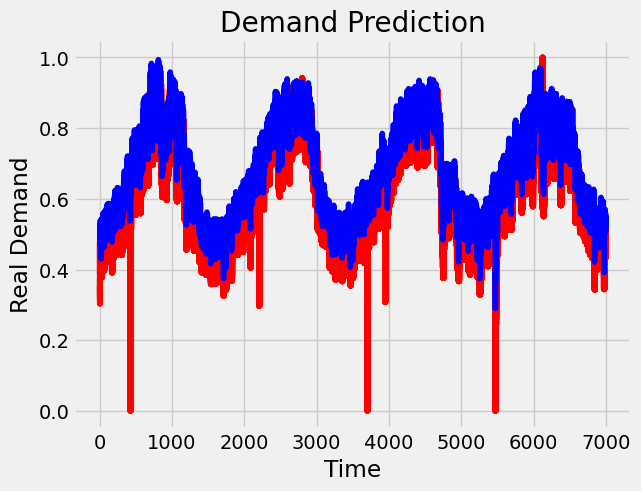

In [137]:
# Visualizing the results for LSTM
plot_predictions(X_test, predicted_stock_price)